## Classify handwritten digits

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score,
                             precision_recall_curve)

In [ ]:
#Load mnist dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X: np.ndarray = mnist["data"]
y: np.ndarray = mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

In [5]:
# Random train/test split example using scikit-learn
from sklearn.model_selection import train_test_split
# Use shuffle=True (default) for a random split; set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
X_train.shape, X_test.shape


((56000, 784), (14000, 784))

In [ ]:
#train a SGDClassifier
sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(X_train, y_train)


array([[5382,    0,   12,   13,   10,   17,   27,    4,   38,   19],
       [   2, 6064,   33,   22,   13,   29,   16,    7,   98,   18],
       [ 115,   49, 4675,  112,   69,   33,  109,   95,  287,   48],
       [  69,   24,  139, 4789,   28,  231,   29,   61,  193,  150],
       [  30,   10,   28,   14, 4844,   17,   58,   30,  159,  269],
       [ 110,   15,   24,  174,   81, 4111,  104,   23,  311,   97],
       [  70,   12,   34,    5,   35,   93, 5181,    5,   58,    8],
       [  33,   25,   46,   39,   83,    9,    4, 5154,   56,  385],
       [  99,   81,   51,  103,   52,  376,   33,   28, 4258,  379],
       [  45,   12,   15,   75,  158,   62,    0,  166,  259, 4775]])

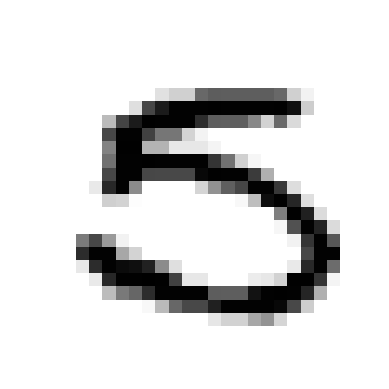

In [15]:
some_digit = X_test[1001]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.axis("off")
plt.show()

In [16]:
sdg_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
y_train_pred = cross_val_predict(sdg_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx
#For multiclass conf matrix is N*N where N is number of classes. 
# Each row represents actual class and each column represents predicted class. 
# The diagonal elements represent the number of correct predictions for each class, while the off-diagonal elements represent the number of misclassifications.

In [18]:
#compute precision, recall and f1 score for each class
score_precison = precision_score(y_train, y_train_pred, average=None)
score_recall = recall_score(y_train, y_train_pred, average=None)
score_f1 = f1_score(y_train, y_train_pred, average=None)
print("Precision scores:", score_precison)
print("Recall scores:", score_recall)
print("F1 scores:", score_f1)

Precision scores: [0.90377834 0.96376351 0.92446114 0.89580995 0.90154476 0.82583367
 0.93166697 0.92481608 0.74479622 0.77667534]
Recall scores: [0.97464687 0.96223421 0.83601574 0.83826361 0.887342   0.81405941
 0.94182876 0.88344189 0.77985348 0.85773307]
F1 scores: [0.93787575 0.96299825 0.87801672 0.86608192 0.894387   0.81990427
 0.9367203  0.90365565 0.7619218  0.8151942 ]
